In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

# Daset Charateristics:

### Number of instances:
**20640**
### Number of attributes:
**8 numeric predictives attributes and the target**
### Goal:
predict house price with the 8 variables
### Attribute informations:
* MedInc: median income in block
* HouseAge: median house age in block
* AveRooms: average number of rooms
* AveBedrms: average number of bedrooms
* Population: block population
* AveOccup: average house occupancy
* Latitude: house block latitude
* Longitude house block longitude

### Target:
median house value in units of 100000 for california district

In [4]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### train_valid_test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train_full, X_test, y_train_full, y_test= train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid= train_test_split(X_train_full, y_train_full, random_state=42)

In [10]:
print('X_train:  ',X_train.shape, '   X_valid:  ', X_valid.shape, '   X_test:  ', X_test.shape)

X_train:   (11610, 8)    X_valid:   (3870, 8)    X_test:   (5160, 8)


### Normalisation des données

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.fit_transform(X_valid)
X_test=scaler.fit_transform(X_test)

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

### Structure de notre réseau

In [14]:
model=keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), 
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# or input_shape=X_train.shape[1:]

In [15]:
model.summary()  # none signifie qu'on a fournie toutes les données d'entrée

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


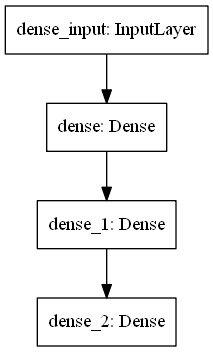

In [16]:
import pydot
keras.utils.plot_model(model)

### learning process

In [17]:
model.compile(loss='mean_squared_error',
             optimizer= keras.optimizers.SGD(learning_rate=1e-3), 
             metrics=['mae']) 
# lr is the learning rate of sgd by default= 0.01
# mae : mean absolute error sum|y-y_pred|

### train model

In [18]:
model_history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7414 - val_mae: 0.6560
Epoch 2/20
363/363 [==============================] - 0s 982us/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6221 - val_mae: 0.5870
Epoch 3/20
363/363 [==============================] - 0s 881us/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5779 - val_mae: 0.5550
Epoch 4/20
363/363 [==============================] - 0s 864us/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5572 - val_mae: 0.5496
Epoch 5/20
363/363 [==============================] - 0s 830us/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.5305 - val_mae: 0.5319
Epoch 6/20
363/363 [==============================] - 0s 830us/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.5113 - val_mae: 0.5224
Epoch 7/20
363/363 [==============================] - 0s 890us/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4974 - val_mae: 0.5151
Epoch 8/20
363/363 [==============================] - 0s 997us/s

In [19]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 617us/step - loss: 0.3993 - mae: 0.4595


In [20]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293243408203,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.4636021554470062,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7413728833198547,
  0.6220595836639404,
  0.5779173374176025,
  0.557186961174

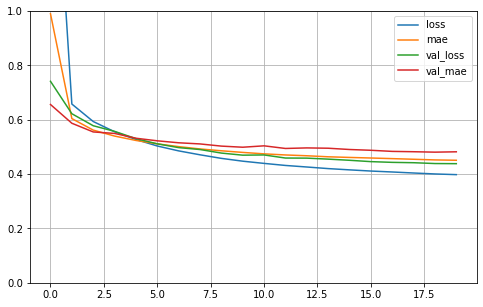

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)          
plt.show()      

In [22]:
X_new=X_test[:3]
y_pred=model.predict(X_new)
y_pred.round(2)

array([[0.49],
       [1.93],
       [3.64]], dtype=float32)

In [23]:
del model

In [24]:
keras.backend.clear_session() 

# Functional API

In [25]:
input_=keras.layers.Input(X_train.shape[1:])
hidden1=keras.layers.Dense(30, activation="relu")(input_)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat= keras.layers.concatenate([input_ , hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_], outputs=[output])

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

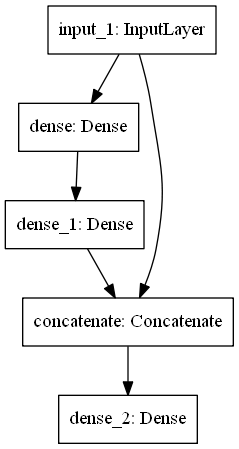

In [27]:
import pydot
keras.utils.plot_model(model)

In [28]:
model.compile(loss='mean_squared_error',
             optimizer= keras.optimizers.SGD(learning_rate=1e-3), 
             metrics=['mae']) 

In [29]:
model_history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.7316 - val_mae: 0.6088
Epoch 2/20
363/363 [==============================] - 0s 841us/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6670 - val_mae: 0.5999
Epoch 3/20
363/363 [==============================] - 0s 851us/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.6248 - val_mae: 0.5768
Epoch 4/20
363/363 [==============================] - 0s 830us/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5963 - val_mae: 0.5662
Epoch 5/20
363/363 [==============================] - 0s 846us/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5699 - val_mae: 0.5521
Epoch 6/20
363/363 [==============================] - 0s 895us/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.5498 - val_mae: 0.5416
Epoch 7/20
363/363 [==============================] - 0s 858us/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.5336 - val_mae: 0.5350
Epoch 8/20
363/363 [==============================] - 0s 815us/s

In [30]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 594us/step - loss: 0.4088 - mae: 0.4677


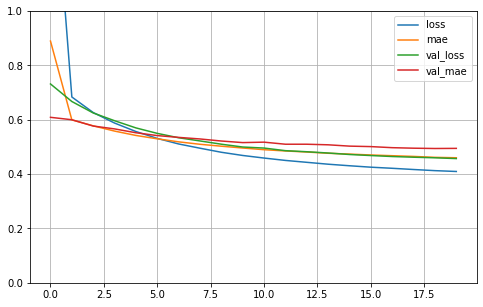

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)          
plt.show()     

In [32]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 622us/step - loss: 0.4088 - mae: 0.4677


[0.40876832604408264, 0.46774259209632874]

# Saving and Restoring our model

In [33]:
model.save("API_Func_Model.h5")

In [34]:
%pwd # le model est sauvegardé sur ce chemin

'C:\\Users\\dell\\Documents\\apprentissage_ML_DL_Python_R_udemy\\codes\\Python_codes\\deep_learning'

In [35]:
del model

In [36]:
keras.backend.clear_session()

### maintenant que le model est supprimé nous allons le rappeler à traver la sauvegarde qu'on a créée

In [38]:
model = keras.models.load_model("API_Func_Model.h5")

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [40]:
y_predict=model.predict(X_new)

In [41]:
y_predict

array([[0.6545357],
       [1.7443745],
       [3.8166654]], dtype=float32)

In [42]:
y_pred

array([[0.48965693],
       [1.9347274 ],
       [3.6413553 ]], dtype=float32)

On ne peut sauvegarder notre modele qu'après l'avoir entrainé. Et dans certaines situations l'entrainement peut prendre beaucoup de temps. ce qui introduit la foction si dessous permettant de sauvegarder le model apres chaque epoch
# Callback function

In [43]:
keras.backend.clear_session()

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
model=keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), 
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [46]:
model.compile(loss='mean_squared_error', optimizer= keras.optimizers.SGD(learning_rate=1e-3)) 

In [47]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5") # si epoch dans les centaines: epoch:03digits

In [48]:
model_history=model.fit(X_train, y_train, epochs=10, 
                        validation_data=(X_valid,y_valid),
                       callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7414
Epoch 2/10
363/363 [==============================] - 0s 892us/step - loss: 0.6577 - val_loss: 0.6221
Epoch 3/10
363/363 [==============================] - 0s 899us/step - loss: 0.5934 - val_loss: 0.5779
Epoch 4/10
363/363 [==============================] - 0s 827us/step - loss: 0.5557 - val_loss: 0.5572
Epoch 5/10
363/363 [==============================] - 0s 899us/step - loss: 0.5272 - val_loss: 0.5305
Epoch 6/10
363/363 [==============================] - 0s 904us/step - loss: 0.5033 - val_loss: 0.5113
Epoch 7/10
363/363 [==============================] - 0s 932us/step - loss: 0.4854 - val_loss: 0.4974
Epoch 8/10
363/363 [==============================] - 0s 876us/step - loss: 0.4709 - val_loss: 0.4903
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4578 - val_loss: 0.4773
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4474 - va

On peut appeler le model correspondant à l' epoch qu'on veut.
Mais il n' y a pas de réel besoin de sauvegarder le model pour chaque epoch, le mieux est de sauvegarder seulement le meilleur model

# Save best only

In [49]:
del model
keras.backend.clear_session()

In [50]:
model=keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), 
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [51]:
model.compile(loss='mean_squared_error', optimizer= keras.optimizers.SGD(learning_rate=1e-3)) 

In [52]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [53]:
model_history=model.fit(X_train, y_train, epochs=10, 
                        validation_data=(X_valid,y_valid),
                       callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8542 - val_loss: 0.8979
Epoch 2/10
363/363 [==============================] - 0s 845us/step - loss: 0.7854 - val_loss: 0.7405
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6817 - val_loss: 0.6815
Epoch 4/10
363/363 [==============================] - 0s 889us/step - loss: 0.6283 - val_loss: 0.6492
Epoch 5/10
363/363 [==============================] - 0s 858us/step - loss: 0.5868 - val_loss: 0.6109
Epoch 6/10
363/363 [==============================] - 0s 887us/step - loss: 0.5510 - val_loss: 0.5858
Epoch 7/10
363/363 [==============================] - 0s 910us/step - loss: 0.5225 - val_loss: 0.5616
Epoch 8/10
363/363 [==============================] - 0s 880us/step - loss: 0.4993 - val_loss: 0.5418
Epoch 9/10
363/363 [==============================] - 0s 840us/step - loss: 0.4803 - val_loss: 0.5263
Epoch 10/10
363/363 [==============================] - 0s 843us/step - loss: 0.4649 - 

##### une chose à savoir est qu'on peut fixé un paramètre qui nous permettra d'arrêter l'entrainement de notre model à partir de l'epoch à partir duquel la precision n'évolue plus. Donc on peut juster donner un grand nombre pour le parametre epoch. une fois la convergence  atteinte l'entrainement cessera après 'patience' nombre de epoch

In [54]:
del model
keras.backend.clear_session()

In [55]:
model=keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]), 
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [56]:
model.compile(loss='mean_squared_error', optimizer= keras.optimizers.SGD(learning_rate=1e-3)) 

In [57]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Early_Stopp_Model.h5",save_best_only=True)

In [58]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [59]:
model_history=model.fit(X_train, y_train, epochs=200, 
                        validation_data=(X_valid,y_valid),
                       callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 1ms/step - loss: 1.4581 - val_loss: 0.8261
Epoch 2/200
363/363 [==============================] - 0s 744us/step - loss: 0.7368 - val_loss: 0.6971
Epoch 3/200
363/363 [==============================] - 0s 812us/step - loss: 0.6516 - val_loss: 0.6317
Epoch 4/200
363/363 [==============================] - 0s 820us/step - loss: 0.5951 - val_loss: 0.5943
Epoch 5/200
363/363 [==============================] - 0s 804us/step - loss: 0.5536 - val_loss: 0.5578
Epoch 6/200
363/363 [==============================] - 0s 799us/step - loss: 0.5199 - val_loss: 0.5338
Epoch 7/200
363/363 [==============================] - 0s 831us/step - loss: 0.4940 - val_loss: 0.5146
Epoch 8/200
363/363 [==============================] - 0s 801us/step - loss: 0.4730 - val_loss: 0.4992
Epoch 9/200
363/363 [==============================] - 0s 822us/step - loss: 0.4563 - val_loss: 0.4867
Epoch 10/200
363/363 [==============================] - 0s 788us/step - los

Epoch 80/200
363/363 [==============================] - 0s 795us/step - loss: 0.3371 - val_loss: 0.4102
Epoch 81/200
363/363 [==============================] - 0s 783us/step - loss: 0.3367 - val_loss: 0.4088
Epoch 82/200
363/363 [==============================] - 0s 845us/step - loss: 0.3362 - val_loss: 0.4093
Epoch 83/200
363/363 [==============================] - 0s 755us/step - loss: 0.3358 - val_loss: 0.4088
Epoch 84/200
363/363 [==============================] - 0s 810us/step - loss: 0.3352 - val_loss: 0.4091
Epoch 85/200
363/363 [==============================] - 0s 803us/step - loss: 0.3348 - val_loss: 0.4113
Epoch 86/200
363/363 [==============================] - 0s 822us/step - loss: 0.3346 - val_loss: 0.4100
Epoch 87/200
363/363 [==============================] - 0s 806us/step - loss: 0.3340 - val_loss: 0.4099
Epoch 88/200
363/363 [==============================] - 0s 794us/step - loss: 0.3332 - val_loss: 0.4087
Epoch 89/200
363/363 [==============================] - 0s 789us

In [60]:
model=keras.models.load_model('Early_Stopp_Model.h5')

In [61]:
mse_tes=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 578us/step - loss: 0.3824
